In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\internship_project\\datasets\\Life Expectancy Data.csv")

In [4]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
data.describe(include=['float64','int64'])

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data.select_dtypes(include='object').nunique()

Country    193
Status       2
dtype: int64

In [9]:
data.columns=['Country','Year','Status','Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI',
         'under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS',
         'GDP','Population','thinness  1-19 years','thinness 5-9 years',
         'Income composition of resources','Schooling']

In [10]:
numcols=['Year','Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI',
         'under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS',
         'GDP','Population','thinness  1-19 years','thinness 5-9 years',
         'Income composition of resources','Schooling']

In [11]:
imputer=SimpleImputer()

In [12]:
data[numcols]=imputer.fit_transform(data[numcols])

In [13]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [14]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [15]:
numcols=['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI',
         'under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS',
         'GDP','Population','thinness  1-19 years','thinness 5-9 years',
         'Income composition of resources','Schooling']

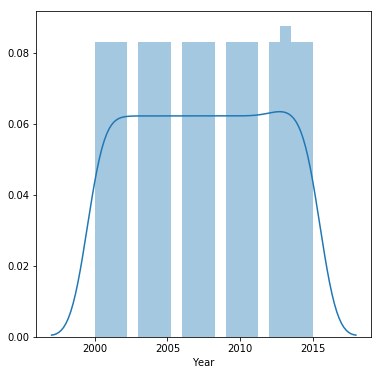

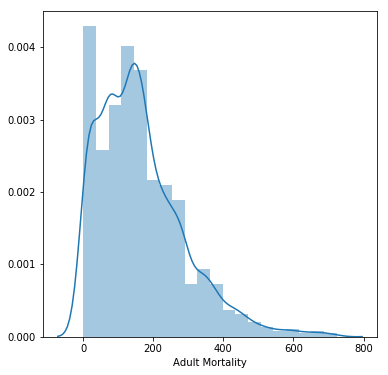

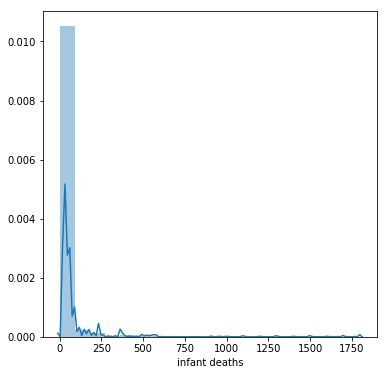

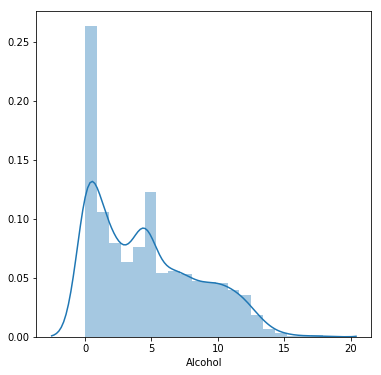

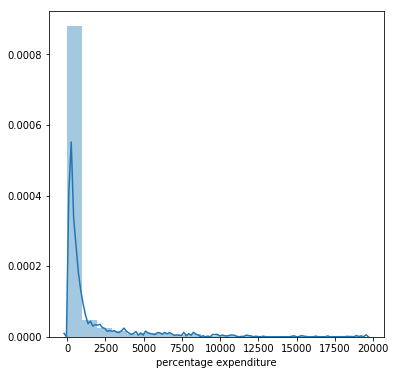

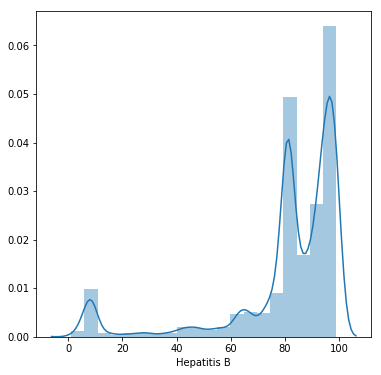

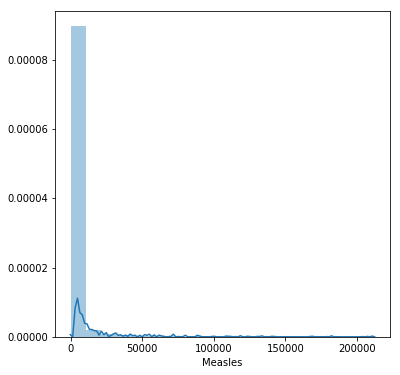

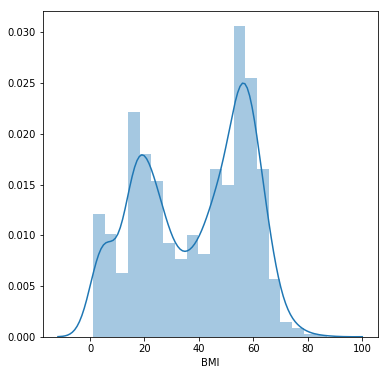

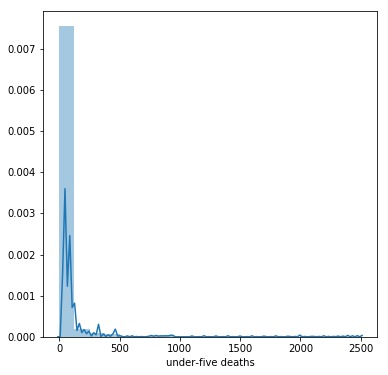

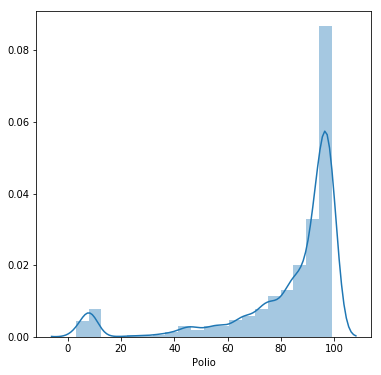

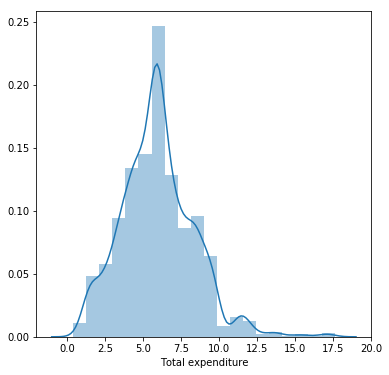

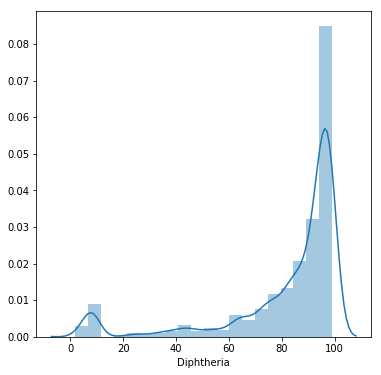

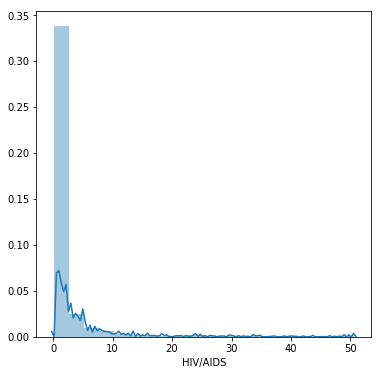

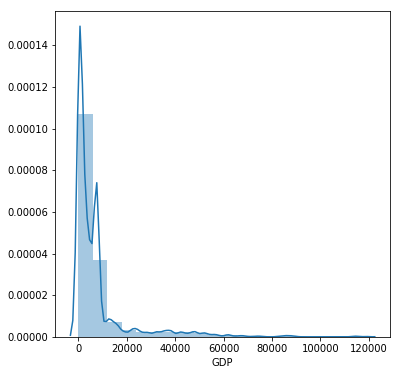

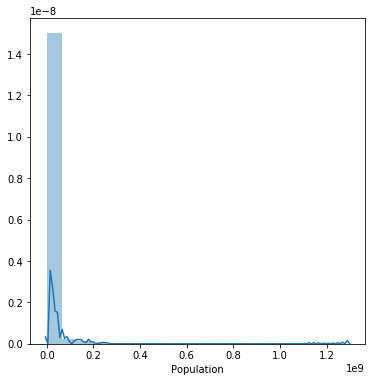

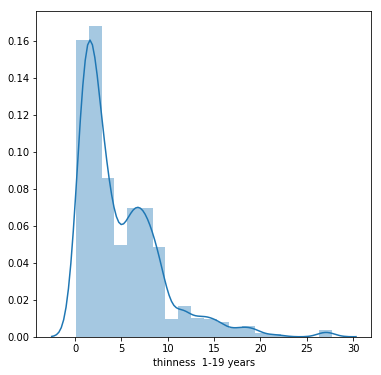

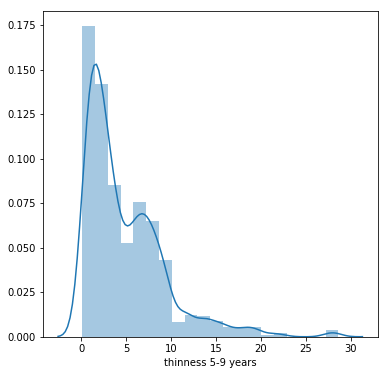

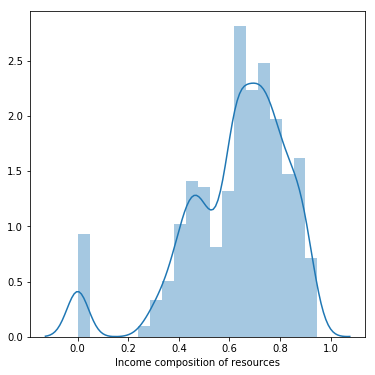

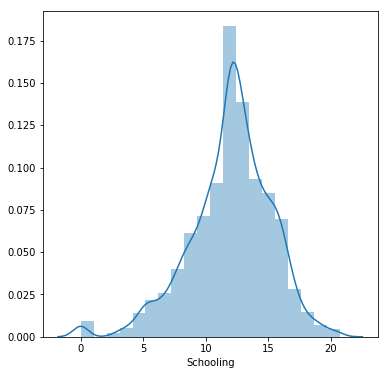

In [16]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.distplot(data[col],bins=20)
    plt.show()

In [17]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


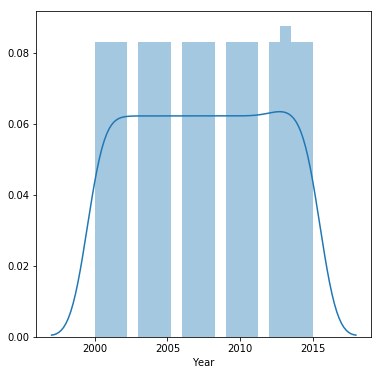

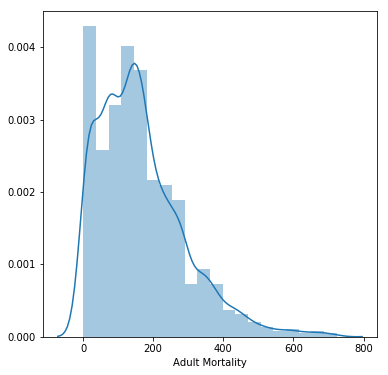

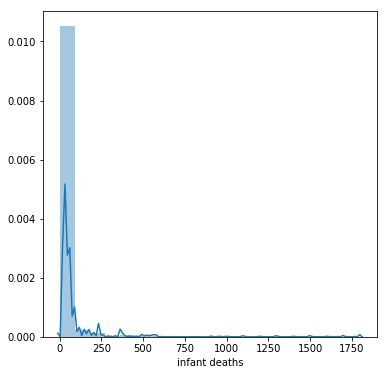

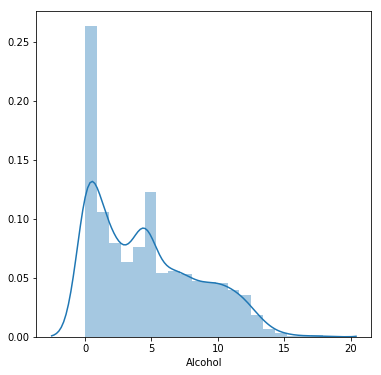

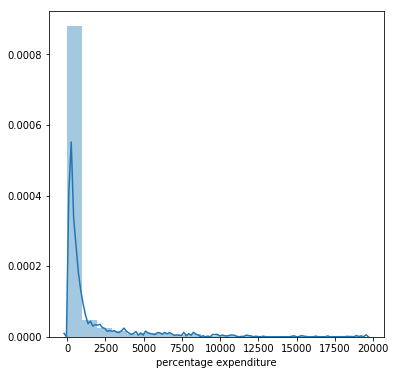

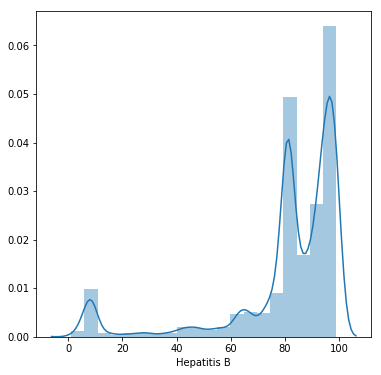

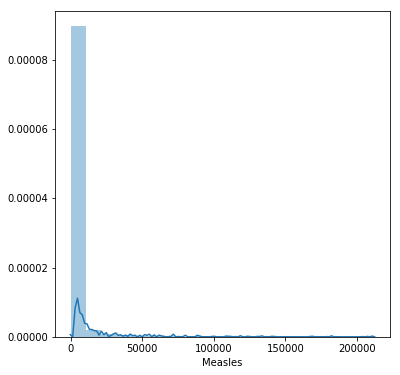

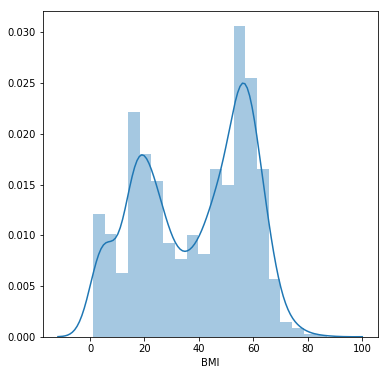

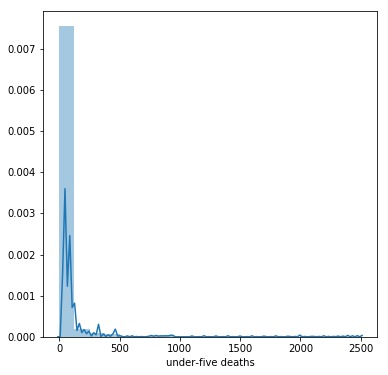

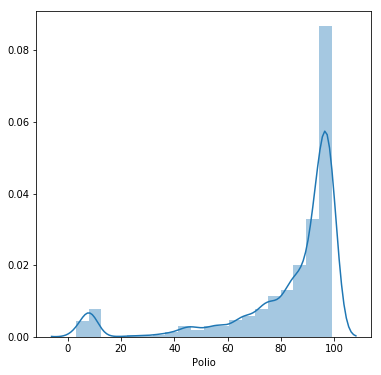

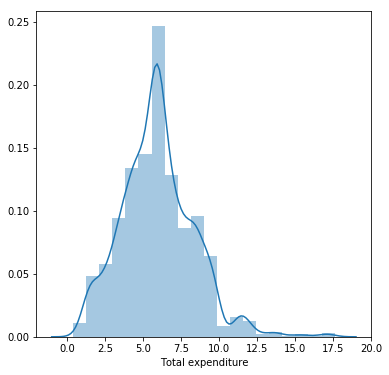

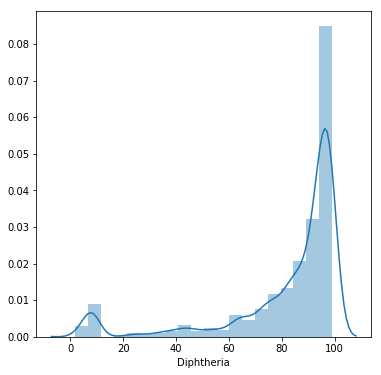

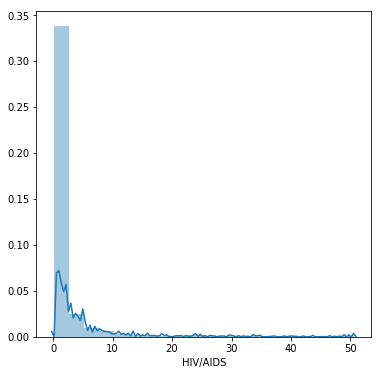

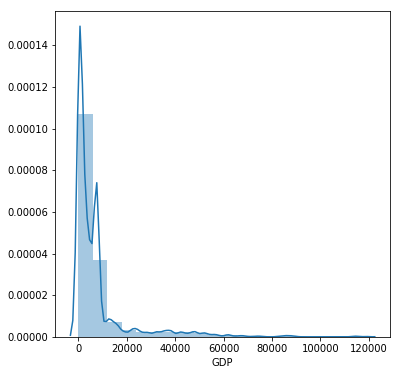

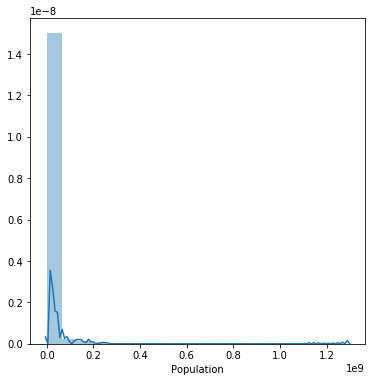

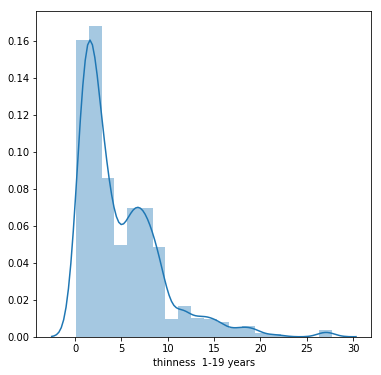

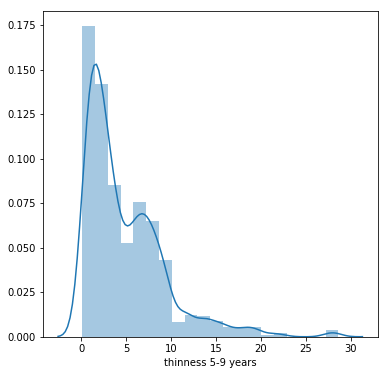

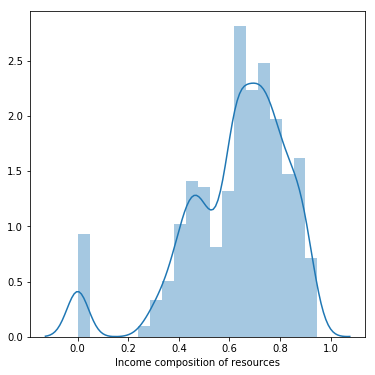

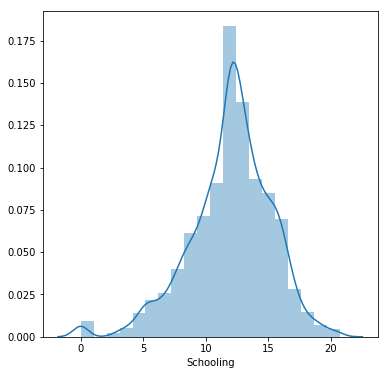

In [18]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.distplot(data[col],bins=20)
    plt.show()

In [19]:
data[numcols]= data[numcols]+ 0.1

In [20]:
for col in numcols:
    data[col] = np.log(data[col])
    
   
    
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,7.608424,Developing,65.0,5.572534,4.128746,-2.207275,4.268012,4.175925,7.051076,...,1.808289,2.111425,4.175925,-1.609438,6.370516,17.334091,2.850707,2.856470,-0.546453,2.322388
1,Afghanistan,7.607928,Developing,59.9,5.602488,4.160444,-2.207275,4.298965,4.128746,6.198682,...,4.062166,2.113843,4.128746,-1.609438,6.418033,12.699494,2.867899,2.867899,-0.551648,2.312535
2,Afghanistan,7.607431,Developing,59.9,5.591360,4.191169,-2.207275,4.294823,4.160444,6.064018,...,4.128746,2.107786,4.160444,-1.609438,6.448644,17.272826,2.879198,2.879198,-0.562119,2.302585
3,Afghanistan,7.606934,Developing,59.5,5.606170,4.235555,-2.207275,4.360346,4.206184,7.932757,...,4.206184,2.154085,4.206184,-1.609438,6.507366,15.123021,2.890372,2.895912,-0.574476,2.292535
4,Afghanistan,7.606437,Developing,59.2,5.617135,4.264087,-2.207275,1.973679,4.220977,8.010725,...,4.220977,2.075684,4.220977,-1.609438,4.153199,14.906964,2.906901,2.906901,-0.590591,2.261763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,7.602950,Developing,44.3,6.583548,3.299534,1.495149,-2.302585,4.220977,3.437208,...,4.206184,1.978239,4.175925,3.517498,6.119125,16.363197,2.251292,2.251292,-0.679244,2.230014
2934,Zimbabwe,7.602451,Developing,44.5,6.572422,3.261935,1.425515,-2.302585,1.960095,6.905853,...,1.960095,1.890095,4.220977,3.605498,6.116888,16.351894,2.292535,2.302585,-0.657780,2.261763
2935,Zimbabwe,7.601952,Developing,44.8,4.291828,3.222868,1.510722,-2.302585,4.291828,5.717357,...,4.291828,1.891605,4.264087,3.686376,4.050886,11.740261,0.262364,0.336472,-0.640555,2.312535
2936,Zimbabwe,7.601452,Developing,45.3,6.531023,3.222868,0.598837,-2.302585,4.332048,6.271177,...,4.332048,1.834180,4.318821,3.742420,6.307529,16.330475,0.530628,0.587787,-0.640555,2.292535


In [21]:
scaler=StandardScaler()
data[numcols]=scaler.fit_transform(data[numcols])

In [22]:
#from sklearn.preprocessing import QuantileTransformer
#qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [23]:
#data[numcols] = qt.fit_transform(data[numcols])

In [24]:
#data

In [25]:
numeric_cols = data.select_dtypes(include='number')

#Calculate the first and third quartiles for each column
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)

#Calculate the IQR for each column
iqr = q3 - q1

#Define the outlier bounds for each column
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

# Filter out rows that fall outside the bounds for each column
for col in numeric_cols.columns:
    data = data[(data[col] >= lower_bounds[col]) & (data[col] <= upper_bounds[col])]

# Print the filtered DataFrame
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,1.187727,Developing,59.9,0.824093,1.292708,-2.082090,0.233760,-0.218926,0.852474,...,-0.291988,0.879475,-0.229980,-0.636725,-0.687079,1.106089,1.739989,1.703027,-0.365730,-0.213491
3,Afghanistan,0.971490,Developing,59.5,0.837963,1.310503,-2.082090,0.252477,-0.142771,1.304378,...,-0.165737,0.981215,-0.156032,-0.636725,-0.654548,0.266506,1.751499,1.719794,-0.392206,-0.231899
4,Afghanistan,0.755145,Developing,59.2,0.848232,1.321942,-2.082090,-0.429278,-0.118141,1.323233,...,-0.141619,0.808933,-0.132116,-0.636725,-1.958700,0.182128,1.768526,1.730818,-0.426735,-0.288259
5,Afghanistan,0.538693,Developing,58.8,0.861752,1.338511,-2.082090,0.257881,-0.167771,1.222807,...,-0.190217,1.148067,-0.180307,-0.636725,-0.760487,0.169410,1.779724,1.741722,-0.450067,-0.346409
6,Afghanistan,0.322133,Developing,58.6,0.868440,1.354423,-2.082090,0.161150,-0.245105,1.310715,...,-0.265944,1.199444,-0.255400,-0.636725,-0.880051,-0.735275,1.790801,1.757859,-0.505517,-0.406466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Zambia,1.403857,Developing,61.1,0.972400,0.949766,-2.082090,0.515755,0.272346,-0.079935,...,0.081759,-0.176423,0.247054,1.659712,-0.126228,-0.069716,0.686249,0.661087,-0.019390,0.209804
2908,Zambia,1.187727,Developing,63.0,1.013241,0.963786,0.029286,-0.127182,0.131163,0.246509,...,-0.003956,-0.176423,0.109963,1.739674,-1.364852,-0.081809,0.702221,0.661087,-0.035440,0.209804
2910,Zambia,0.755145,Developing,58.2,1.115878,0.963786,0.071004,0.495263,0.172738,1.681089,...,0.182929,-0.516602,0.150332,1.938084,-0.157101,0.793844,0.733440,0.692438,-0.107524,0.135642
2922,Zimbabwe,1.619879,Developing,67.0,1.035804,0.853470,0.453166,-1.650799,0.291573,-1.170765,...,0.278187,0.198961,0.265723,1.926384,-1.612913,0.833206,0.566925,0.542930,-0.230974,-0.141656


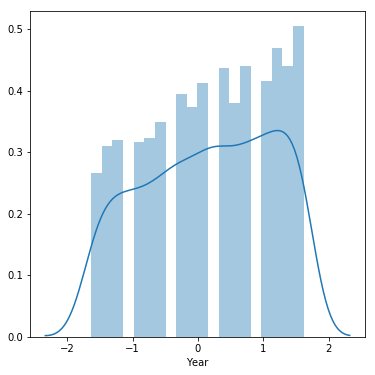

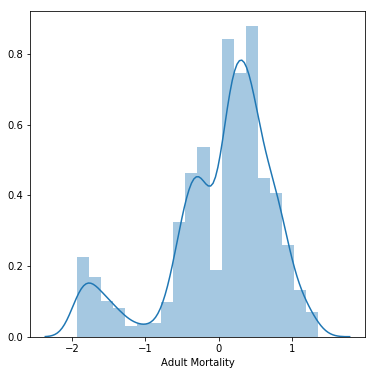

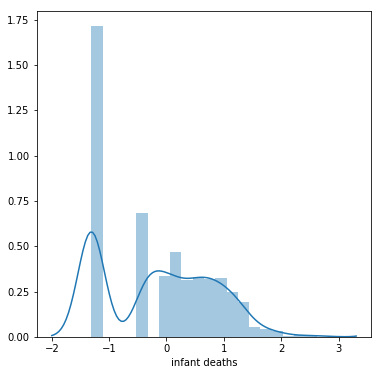

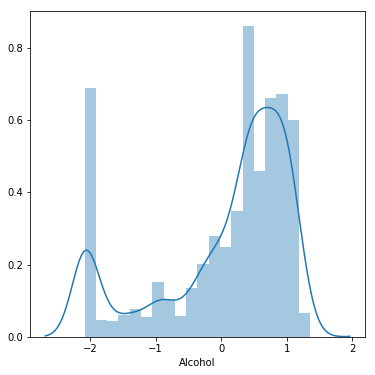

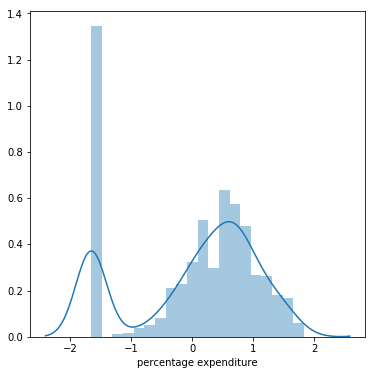

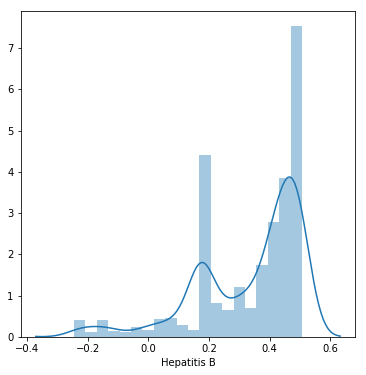

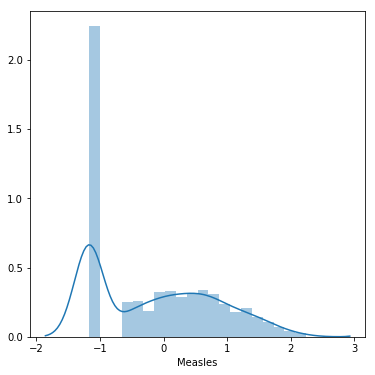

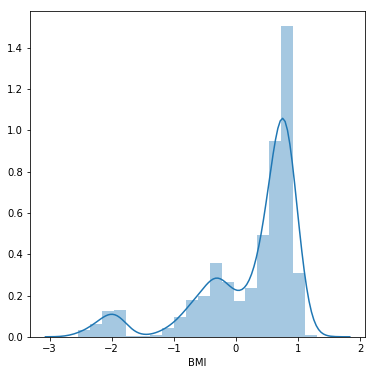

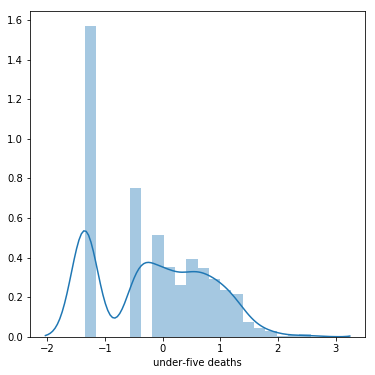

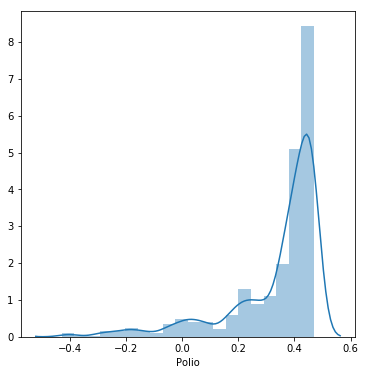

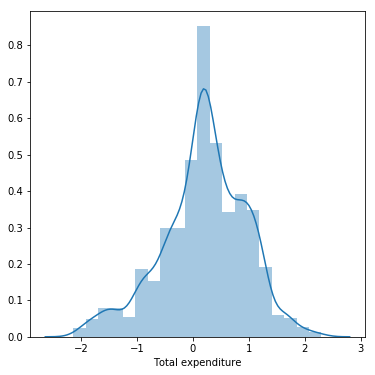

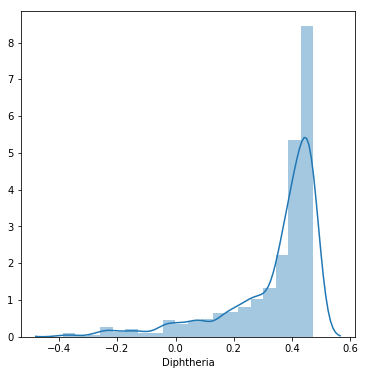

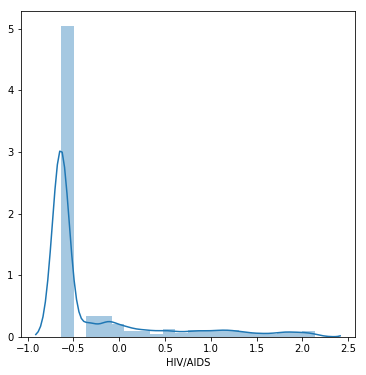

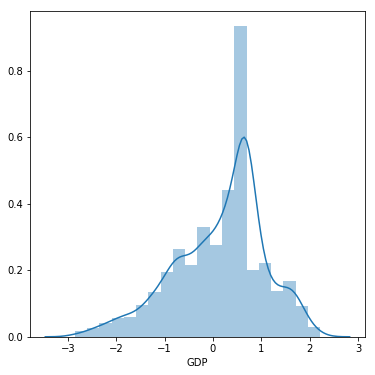

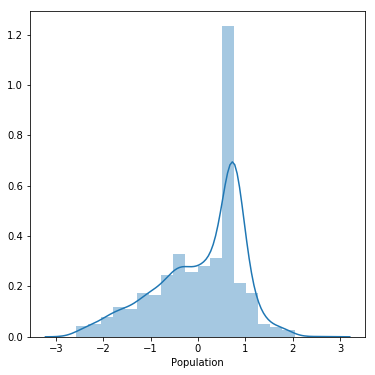

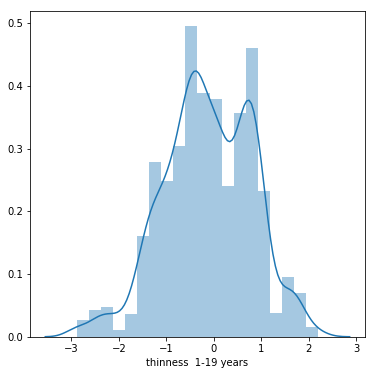

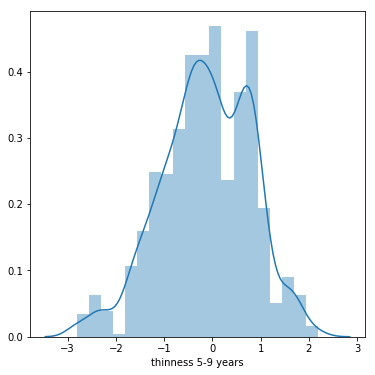

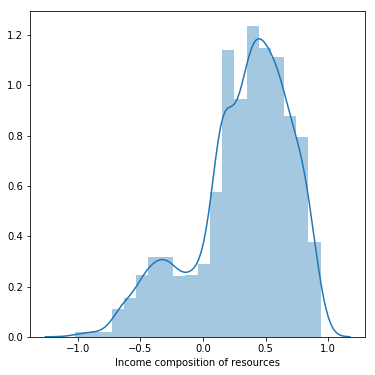

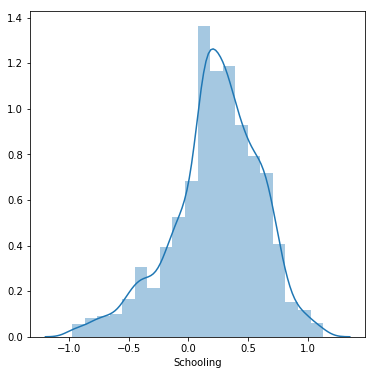

In [26]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.distplot(data[col],bins=20)
    plt.show()

In [27]:
catcols=['Country','Status']

In [28]:
for i in catcols:
    le= LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [29]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,0,1.187727,1,59.9,0.824093,1.292708,-2.082090,0.233760,-0.218926,0.852474,...,-0.291988,0.879475,-0.229980,-0.636725,-0.687079,1.106089,1.739989,1.703027,-0.365730,-0.213491
3,0,0.971490,1,59.5,0.837963,1.310503,-2.082090,0.252477,-0.142771,1.304378,...,-0.165737,0.981215,-0.156032,-0.636725,-0.654548,0.266506,1.751499,1.719794,-0.392206,-0.231899
4,0,0.755145,1,59.2,0.848232,1.321942,-2.082090,-0.429278,-0.118141,1.323233,...,-0.141619,0.808933,-0.132116,-0.636725,-1.958700,0.182128,1.768526,1.730818,-0.426735,-0.288259
5,0,0.538693,1,58.8,0.861752,1.338511,-2.082090,0.257881,-0.167771,1.222807,...,-0.190217,1.148067,-0.180307,-0.636725,-0.760487,0.169410,1.779724,1.741722,-0.450067,-0.346409
6,0,0.322133,1,58.6,0.868440,1.354423,-2.082090,0.161150,-0.245105,1.310715,...,-0.265944,1.199444,-0.255400,-0.636725,-0.880051,-0.735275,1.790801,1.757859,-0.505517,-0.406466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,179,1.403857,1,61.1,0.972400,0.949766,-2.082090,0.515755,0.272346,-0.079935,...,0.081759,-0.176423,0.247054,1.659712,-0.126228,-0.069716,0.686249,0.661087,-0.019390,0.209804
2908,179,1.187727,1,63.0,1.013241,0.963786,0.029286,-0.127182,0.131163,0.246509,...,-0.003956,-0.176423,0.109963,1.739674,-1.364852,-0.081809,0.702221,0.661087,-0.035440,0.209804
2910,179,0.755145,1,58.2,1.115878,0.963786,0.071004,0.495263,0.172738,1.681089,...,0.182929,-0.516602,0.150332,1.938084,-0.157101,0.793844,0.733440,0.692438,-0.107524,0.135642
2922,180,1.619879,1,67.0,1.035804,0.853470,0.453166,-1.650799,0.291573,-1.170765,...,0.278187,0.198961,0.265723,1.926384,-1.612913,0.833206,0.566925,0.542930,-0.230974,-0.141656


In [30]:
corrr=data.corr().abs()

In [31]:
corrr

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.013861,0.072521,0.045374,0.023036,0.002056,0.028154,0.075492,0.029696,0.072315,...,0.014324,0.015302,0.028966,0.038280,0.013409,0.027007,0.031149,0.023555,0.013593,0.055493
Year,0.013861,1.000000,0.076043,0.018219,0.037453,0.007525,0.136788,0.184463,0.109861,0.027164,...,0.001767,0.075587,0.028094,0.036551,0.077650,0.061848,0.045773,0.050985,0.010616,0.077708
Status,0.072521,0.076043,1.000000,0.495195,0.251341,0.390337,0.414510,0.224299,0.005927,0.000655,...,0.211080,0.379325,0.222543,0.274117,0.352422,0.083186,0.483746,0.487001,0.486353,0.492875
Life expectancy,0.045374,0.018219,0.495195,1.000000,0.456093,0.517618,0.347636,0.279649,0.270266,0.195951,...,0.514844,0.274482,0.525333,0.707390,0.476390,0.064331,0.562319,0.572724,0.828042,0.725660
Adult Mortality,0.023036,0.037453,0.251341,0.456093,1.000000,0.280398,0.125844,0.172623,0.134609,0.080848,...,0.238135,0.097697,0.239313,0.324810,0.197357,0.044433,0.235110,0.249146,0.364144,0.300409
infant deaths,0.002056,0.007525,0.390337,0.517618,0.280398,1.000000,0.325198,0.220398,0.235367,0.510039,...,0.381446,0.181010,0.390348,0.358325,0.373808,0.288394,0.432171,0.431499,0.569489,0.536011
Alcohol,0.028154,0.136788,0.414510,0.347636,0.125844,0.325198,1.000000,0.093795,0.083884,0.191500,...,0.231723,0.385941,0.240118,0.108862,0.258831,0.116788,0.420399,0.402831,0.406190,0.424576
percentage expenditure,0.075492,0.184463,0.224299,0.279649,0.172623,0.220398,0.093795,1.000000,0.008593,0.054605,...,0.126580,0.069046,0.139524,0.129921,0.218556,0.245006,0.205024,0.199280,0.345106,0.308983
Hepatitis B,0.029696,0.109861,0.005927,0.270266,0.134609,0.235367,0.083884,0.008593,1.000000,0.161385,...,0.726143,0.054423,0.740957,0.277877,0.142594,0.038519,0.013646,0.008497,0.296567,0.271662
Measles,0.072315,0.027164,0.000655,0.195951,0.080848,0.510039,0.191500,0.054605,0.161385,1.000000,...,0.200692,0.167229,0.201516,0.110613,0.084420,0.183016,0.278232,0.274704,0.198121,0.209563


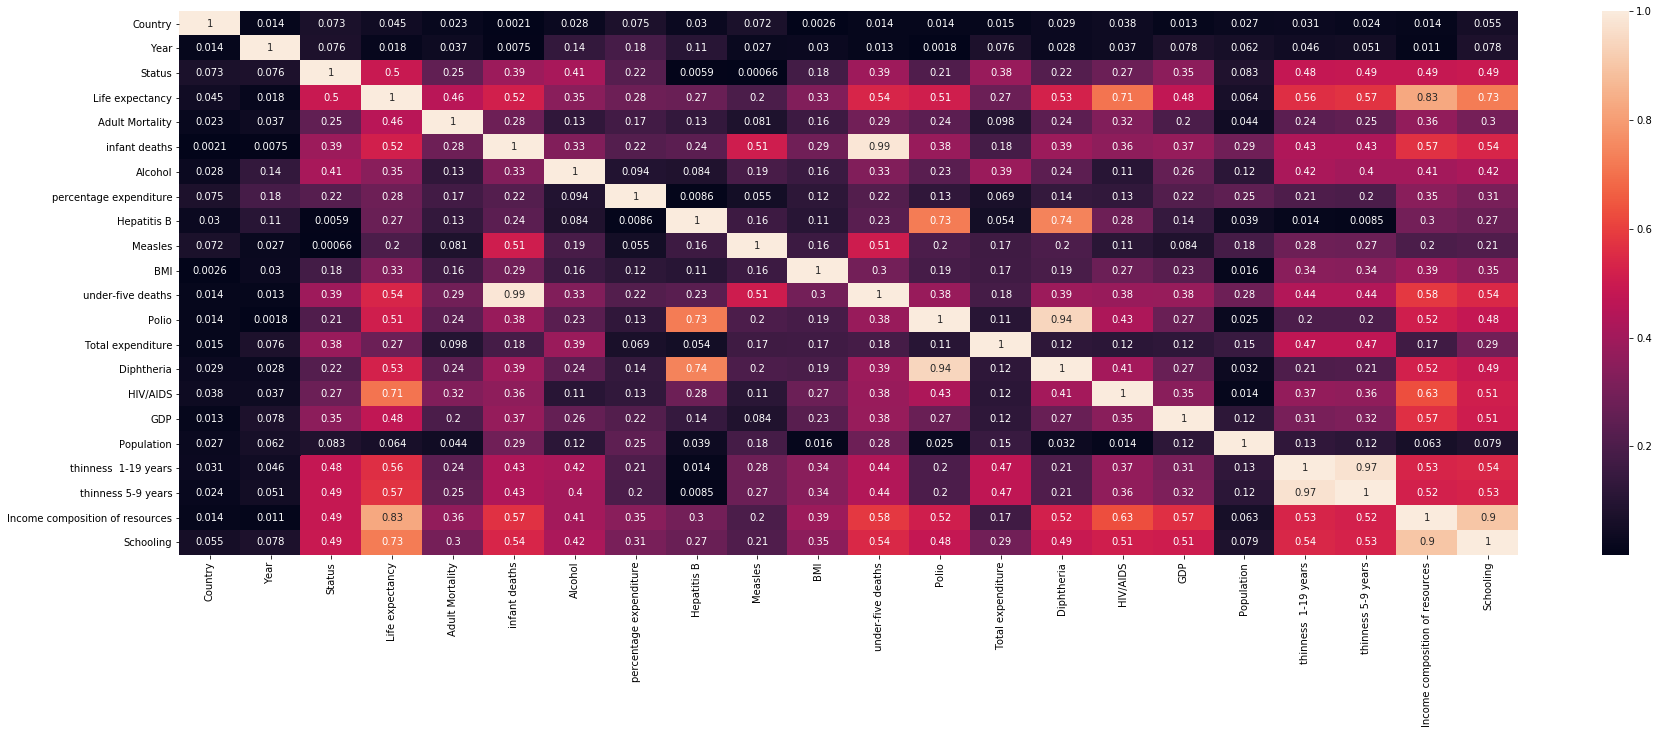

In [32]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr,annot=True)
plt.show()

In [33]:
data1=data.drop(['Population','Total expenditure','Country','Hepatitis B','Measles','Year'],axis=1)

In [34]:
X = data1.drop(['Life expectancy'], axis=1)
y = data1[['Life expectancy']]


In [35]:
X

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,1,0.824093,1.292708,-2.082090,0.233760,-0.650112,1.276900,-0.291988,-0.229980,-0.636725,-0.687079,1.739989,1.703027,-0.365730,-0.213491
3,1,0.837963,1.310503,-2.082090,0.252477,-0.684927,1.293891,-0.165737,-0.156032,-0.636725,-0.654548,1.751499,1.719794,-0.392206,-0.231899
4,1,0.848232,1.321942,-2.082090,-0.429278,-0.713495,1.310167,-0.141619,-0.132116,-0.636725,-1.958700,1.768526,1.730818,-0.426735,-0.288259
5,1,0.861752,1.338511,-2.082090,0.257881,-0.750147,1.329594,-0.190217,-0.180307,-0.636725,-0.760487,1.779724,1.741722,-0.450067,-0.346409
6,1,0.868440,1.354423,-2.082090,0.161150,-0.787908,1.344463,-0.265944,-0.255400,-0.636725,-0.880051,1.790801,1.757859,-0.505517,-0.406466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,1,0.972400,0.949766,-2.082090,0.515755,-0.363020,0.977529,0.081759,0.247054,1.659712,-0.126228,0.686249,0.661087,-0.019390,0.209804
2908,1,1.013241,0.963786,0.029286,-0.127182,-0.390610,0.986830,-0.003956,0.109963,1.739674,-1.364852,0.702221,0.661087,-0.035440,0.209804
2910,1,1.115878,0.963786,0.071004,0.495263,-0.453541,1.004787,0.182929,0.150332,1.938084,-0.157101,0.733440,0.692438,-0.107524,0.135642
2922,1,1.035804,0.853470,0.453166,-1.650799,0.051241,0.881904,0.278187,0.265723,1.926384,-1.612913,0.566925,0.542930,-0.230974,-0.141656


In [36]:
y

,Life expectancy
2,59.9
3,59.5
4,59.2
5,58.8
6,58.6
...,...
2907,61.1
2908,63.0
2910,58.2
2922,67.0


In [37]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [38]:
X_trainval.shape

(1211, 15)

In [39]:
X_test.shape

(520, 15)

In [40]:
y_trainval.shape

(1211, 1)

In [41]:
y_test.shape

(520, 1)

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2,random_state=42)

In [43]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [44]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
# r2 of train and val
y_val_pred1 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred1)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred1)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred1 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred1)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred1)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.8165779698664882
Mean squared error: 9.743418318260039
Root Mean Squared Error: 3.1214449087337806
Mean Absolute Error: 2.2609959264125523
R-squared score: 0.7806860991445557
Mean squared error: 10.52654131176927
Root Mean Squared Error: 3.24446317774902
Mean Absolute Error: 2.32203083510529


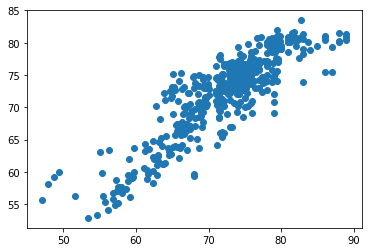

In [46]:
plt.scatter(y_test, y_test_pred1)

In [47]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)


In [48]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [49]:
# r2 of train and val
y_val_pred2= lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred2)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred2)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=2)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score:", r2)
# mse of test and pred (degree=2)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred2)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.9057183634313521
Mean squared error: 5.008261134989281
Root Mean Squared Error: 2.2379144610528083
Mean Absolute Error: 1.500950118736156
R-squared score: 0.8669831336660548
Mean squared error: 6.384490600754391
Root Mean Squared Error: 2.5267549546314125
Mean Absolute Error: 1.768023493840144


In [50]:
min_vals = np.min(y_val, axis=0)
max_vals = np.max(y_val, axis=0)
ranges = max_vals - min_vals
ranges

Life expectancy    39.3
dtype: float64

In [51]:
min_vals = np.min(y_test, axis=0)
max_vals = np.max(y_test, axis=0)
ranges = max_vals - min_vals
ranges

Life expectancy    41.9
dtype: float64

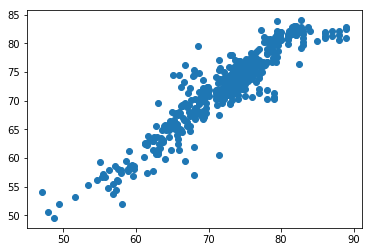

In [52]:
plt.scatter(y_test, y_test_pred2)

In [53]:
y_test

,Life expectancy
1017,63.0
2009,75.3
1064,76.0
2765,86.0
2096,79.4
...,...
2118,67.1
442,48.7
2764,87.0
2890,65.7


In [54]:
pd.DataFrame(y_test_pred2)

,0
0,61.087402
1,75.292480
2,70.718262
3,81.331787
4,81.421387
...,...
515,68.837402
516,49.552246
517,81.323242
518,64.011230


In [55]:
##XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics

In [56]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [57]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)


In [58]:
xgb_reg.fit(X_train_poly, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
y_pred = xgb_reg.predict(X_val_poly)

In [60]:
r2_sales = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_sales)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.9403728064125338
Mean squared error: 3.1674095518606413
Root Mean Squared Error: 1.7797217624844175
Mean Absolute Error: 1.2369258598988682


In [61]:
data_prediction =xgb_reg.predict(X_test_poly)

In [62]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, data_prediction)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.9181989851415931
Mean squared error: 3.9262525489400426
Root Mean Squared Error: 1.9814773652353546
Mean Absolute Error: 1.3900146324747797


In [63]:
from sklearn.ensemble import BaggingRegressor
# Create a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
linear_reg = LinearRegression()

# Create a bagging regressor
bag_reg = BaggingRegressor(base_estimator=linear_reg, n_estimators=10, max_samples=0.5, random_state=42)

# Fit the bagging model to the data
bag_reg.fit(poly_reg.fit_transform(X_train), y_train)


BaggingRegressor(base_estimator=LinearRegression(), max_samples=0.5,
                 random_state=42)

In [64]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_val))

In [65]:
# R squared Value
r2_data = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.8568130947141599
Mean squared error: 7.606119695008899
Root Mean Squared Error: 2.757919450420715
Mean Absolute Error: 1.6852155404525984


In [66]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_test))

In [67]:
# R squared Value
r2_data = metrics.r2_score(y_test, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.8253262631499356
Mean squared error: 8.383920489587485
Root Mean Squared Error: 2.8955000413723853
Mean Absolute Error: 1.955666769362188
